# **Class 13: Streamlit**

In [1]:
from IPython.display import Image, display
project_path = "C:/Users/tiago/OneDrive/Documentos/CapstoneProject/"

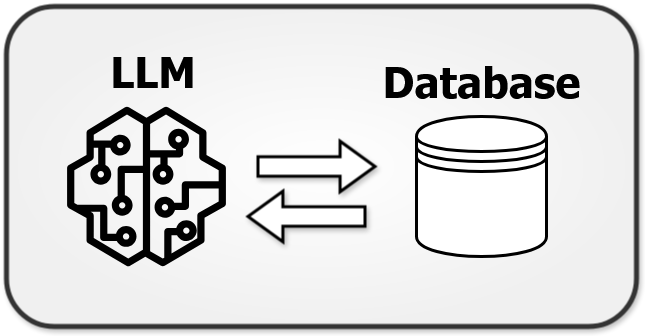

In [ ]:
display(Image(filename=project_path+'images/class13/first.png', width=600, height=800))

Streamlit is an open-source Python library for quickly building interactive web apps, particularly for data science and machine learning. It works by running Python scripts and automatically generating a user-friendly web interface, allowing developers to focus on functionality without needing HTML, CSS, or JavaScript.

Developers use simple Python commands to add widgets like sliders, buttons, and input fields, which Streamlit processes to create dynamic, interactive components. It also integrates with popular visualization libraries like Matplotlib and Plotly, making it ideal for sharing models, analytics, and data insights in a visually appealing and accessible format.

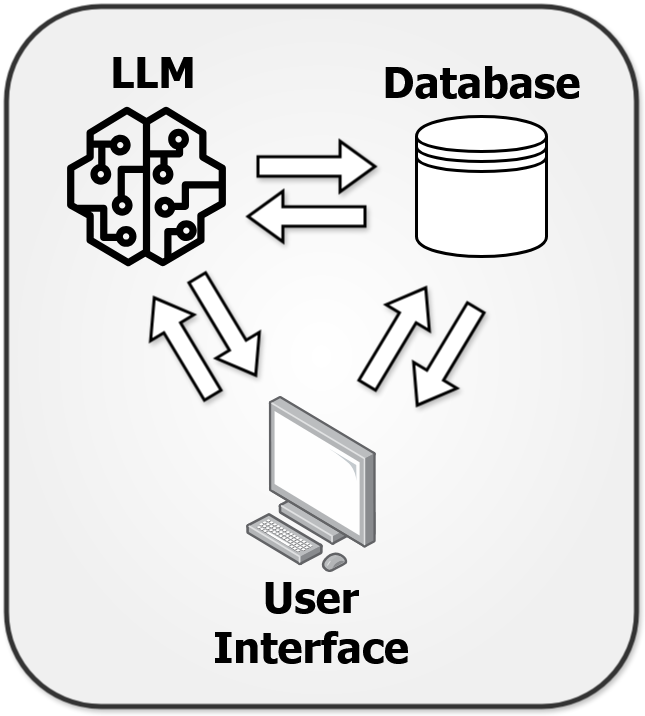

In [5]:
display(Image(filename=project_path+'images/class13/second.png', width=600, height=800))

## Part 1 - Setup of Streamlit

1. In the terminal with your environment activated, type:

In [ ]:
pip install streamlit

2. Test that the installation worked by launching the Streamlit Hello example app:

In [ ]:
streamlit hello


If this doesn't work, use the long-form command:

In [ ]:
python -m streamlit hello

## Part 2 - Create a Hello World App

1. Create a Python file named app.py in your project folder.

2. Copy the following code into app.py and save it.

In [ ]:
import streamlit as st

st.write("Hello World")

3. In your terminal, type:

In [ ]:
streamlit run app.py

If this doesn't work, use the long-form command:

In [ ]:
python -m streamlit run app.py

4. Change st.write to st.title and save your file:

In [ ]:
import streamlit as st

st.title("Hello World")

5. In your browser, click "Always rerun" to instantly rerun your app whenever you save a change to your file.
Automatically rerun your app when your source file changes.


### Development flow

Every time you want to update your app, save the source file. When you do that, Streamlit detects if there is a change and asks you whether you want to rerun your app. Choose "Always rerun" at the top-right of your screen to automatically update your app every time you change its source code.

### Data flow
Streamlit's architecture allows you to write apps the same way you write plain Python scripts. To unlock this, Streamlit apps have a unique data flow: any time something must be updated on the screen, Streamlit reruns your entire Python script from top to bottom.

This can happen in two situations:

1. Whenever you modify your app's source code.

2. Whenever a user interacts with widgets in the app. For example, when dragging a slider, entering text in an input box, or clicking a button.


## Part 3 - Widgets

When you've got the data or model into the state that you want to explore, you can add in widgets like `st.slider()`, `st.button()` or `st.selectbox()`. It's really straightforward — treat widgets as variables:

When you create a widget in a Streamlit app, Streamlit generates a widget ID and uses it to make your widget stateful.

As your app reruns with user interaction, Streamlit keeps track of the widget's value by associating its value to its ID. In particular, a widget's ID depends on the page where it's created.

If you define an identical widget on two different pages, then the widget will reset to its default value when you switch pages.

1. Change your app.py file:

In [ ]:
import streamlit as st

st.title("My First Streamlit App")
name = st.text_input("Enter your name")
if name:
    st.write(f"Hello, {name}!")

number = st.slider("Select a number", 0, 100)
st.write(f"Selected number: {number}")

Widgets can also be accessed by key, if you choose to specify a string to use as the unique key for the widget:

In [ ]:
import streamlit as st

st.title("My First Streamlit App")
st.text_input("Enter your name", key="name")
if st.session_state.name:
    st.write(f"Hello, {st.session_state.name}!")

st.slider("Select a number", 0, 100, key="number")
st.write(f"Selected number: {st.session_state.number}")

Every widget with a key is automatically added to Session State.

## Part 4 - Session State



Session State is a way to share variables between reruns, for each user session. In addition to the ability to store and persist state, Streamlit also exposes the ability to manipulate state using Callbacks. Session state also persists across apps inside a multipage app.

### What is a session?

A session is a single instance of viewing an app. If you view an app from two different tabs in your browser, each tab will have its own session. So each viewer of an app will have a Session State tied to their specific view. Streamlit maintains this session as the user interacts with the app. If the user refreshes their browser page or reloads the URL to the app, their Session State resets and they begin again with a new session.

The Session State API follows a field-based API, which is very similar to Python dictionaries:

In [ ]:
# Initialization
if 'key' not in st.session_state:
    st.session_state['key'] = 'value'

# Session State also supports attribute based syntax
if 'key' not in st.session_state:
    st.session_state.key = 'value'

Delete items in Session State using the syntax to delete items in any Python dictionary:

In [ ]:
# Delete a single key-value pair
del st.session_state[key]

# Delete all the items in Session state
for key in st.session_state.keys():
    del st.session_state[key]

### Forms and Callbacks

Widgets inside a form can have their values be accessed and set via the Session State API. `st.form_submit_button` can have a callback associated with it. The callback gets executed upon clicking on the submit button. For example:

In [ ]:
import streamlit as st


def form_callback():
    st.write(st.session_state.my_slider)
    st.write(st.session_state.my_checkbox)


with st.form(key="my_form"):
    slider_input = st.slider("My slider", 0, 10, 5, key="my_slider")
    checkbox_input = st.checkbox("Yes or No", key="my_checkbox")
    submit_button = st.form_submit_button(label="Submit", on_click=form_callback)

### Limitations

- Only the `st.form_submit_button` has a callback in forms. Other widgets inside a form are not allowed to have callbacks.

- `on_change` and `on_click` events are only supported on input type widgets.


## Part 5 - Caching

Caching allows your app to stay performant even when loading data from the web, manipulating large datasets, or performing expensive computations.

The basic idea behind caching is to store the results of expensive function calls and return the cached result when the same inputs occur again. This avoids repeated execution of a function with the same input values.

To cache a function in Streamlit, you need to apply a caching decorator to it. You have two choices:

- `st.cache_data` is the recommended way to cache computations that return data. Use `st.cache_data` when you use a function that returns a serializable data object (e.g. str, int, float, DataFrame, dict, list). It creates a new copy of the data at each function call, making it safe against mutations and race conditions. The behavior of st.cache_data is what you want in most cases – so if you're unsure, start with `st.cache_data` and see if it works!
    
- `st.cache_resource` is the recommended way to cache global resources like ML models or database connections. Use `st.cache_resource` when your function returns unserializable objects that you don’t want to load multiple times. It returns the cached object itself, which is shared across all reruns and sessions without copying or duplication. If you mutate an object that is cached using `st.cache_resource`, that mutation will exist across all reruns and sessions.

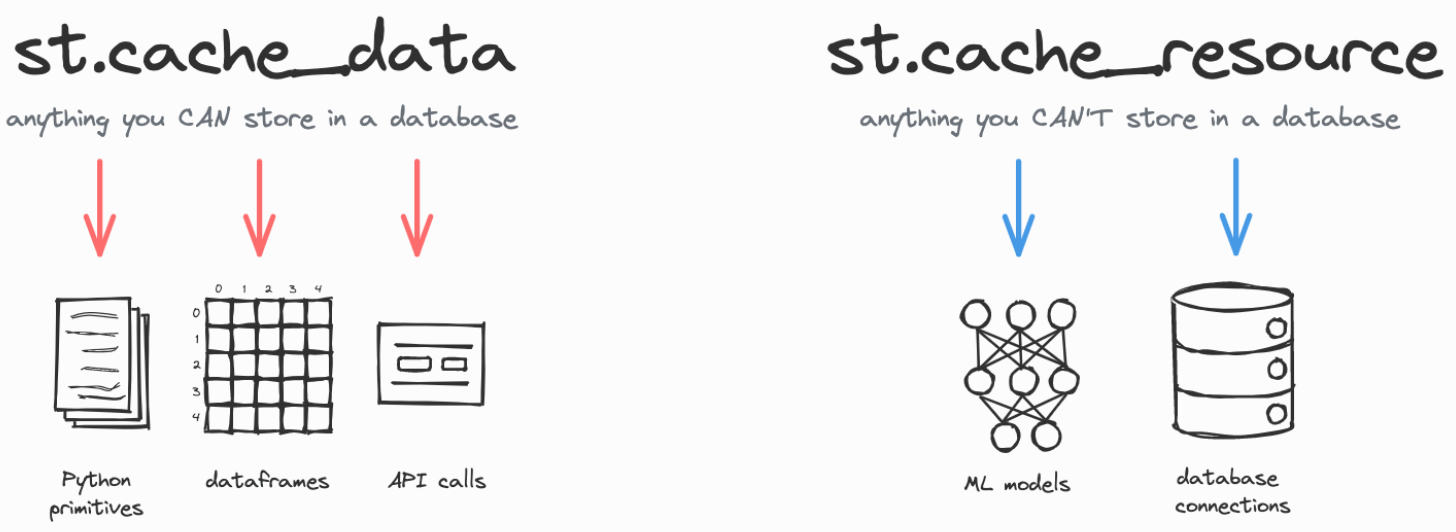

In [7]:
display(Image(filename=project_path+'images/class13/third.png', width=800, height=800))

In [ ]:
@st.cache_resource
def load_bot():
    return CustomerServiceBot()

bot = load_bot()

In [ ]:
@st.cache_data
def load_data(url):
    df = pd.read_csv(url)
    return df

df = load_data("https://github.com/plotly/datasets/raw/master/uber-rides-data1.csv")
st.dataframe(df)

st.button("Rerun")

## Part 6 - Complex Layouts  

`st.container`

- Insert a multi-element container.

- Inserts an invisible container into your app that can be used to hold multiple elements. This allows you to, for example, insert multiple elements into your app out of order.

- To add elements to the returned container, you can use the `with` notation (preferred) or just call methods directly on the returned object. See examples below.


In [ ]:
import streamlit as st
import numpy as np

with st.container():
    st.write("This is inside the container")

    # You can call any Streamlit command, including custom components:
    st.bar_chart(np.random.randn(50, 3))

st.write("This is outside the container")

`st.columns`

- Inserts a number of multi-element containers laid out side-by-side and returns a list of container objects.

- To add elements to the returned containers, you can use the `with` notation (preferred) or just call methods directly on the returned object. See examples below.

- Columns can only be placed inside other columns up to one level of nesting.

In [ ]:
col1, col2 = st.columns(2)

with col1:
    first_name = st.text_input("First Name")
    email = st.text_input("Email")
    phone = st.text_input("Phone Number")
    address = st.text_area("Address")

with col2:
    last_name = st.text_input("Last Name")
    password = st.text_input("Password", type="password")
    gender = st.selectbox("Gender", ["Select", "Male", "Female", "Other"])

## Part 7 - Let's Build Our Own App

We will create a empty database and a table to store information about our users.

In [1]:
import sqlite3
from datetime import datetime

conn = sqlite3.connect('ecommerce.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS users (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    password TEXT NOT NULL,
    phone TEXT NOT NULL,
    address TEXT NOT NULL,
    gender TEXT NOT NULL,
    date_of_birth DATE NOT NULL,
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
)
''')

conn.commit()
conn.close()


Let's copy this code to a module called `users.py` it will be used to interact with our users database.

In [ ]:
class UserDatabase:
    """
    Class to interact with SQLite database table 'users'.

    Schema:
    - id: INTEGER PRIMARY KEY AUTOINCREMENT
    - first_name: TEXT NOT NULL
    - last_name: TEXT NOT NULL
    - email: TEXT UNIQUE NOT NULL
    - password: TEXT NOT NULL
    - phone: TEXT NOT NULL
    - address: TEXT NOT NULL
    - gender: TEXT NOT NULL
    - date_of_birth: DATE NOT NULL
    - created_at: TIMESTAMP DEFAULT CURRENT_TIMESTAMP

    This class provides methods for common operations such as adding,
    removing, and updating users, as well as verifying and retrieving user data.
    """

    def __init__(self, conn):
        """
        Initialize the UserDatabase instance.

        Args:
            conn (sqlite3.Connection): SQLite database connection object.
        """
        self.conn = conn

    def check_if_email_exists(self, email):
        """
        Check if an email already exists in the database.

        Args:
            email (str): Email address to check.

        Returns:
            bool: True if the email exists, False otherwise.
        """
        cursor = self.conn.cursor()
        try:
            cursor.execute(
                "SELECT email FROM users WHERE email = :email", {"email": email}
            )
            return cursor.fetchone() is not None
        finally:
            cursor.close()

    def add_user(self, first_name, last_name, email, password, phone, address, gender, dob):
        """
        Add a new user to the database.

        Args:
            first_name (str): User's first name.
            last_name (str): User's last name.
            email (str): User's email address.
            password (str): User's password (hashed).
            phone (str): User's phone number.
            address (str): User's address.
            gender (str): User's gender.
            dob (str): User's date of birth.

        Returns:
            bool: True if the user was added successfully, False otherwise.
        """
        cursor = self.conn.cursor()
        try:
            cursor.execute(
                """
                INSERT INTO users (first_name, last_name, email, password, phone, address, gender, date_of_birth)
                VALUES (:first_name, :last_name, :email, :password, :phone, :address, :gender, :dob)
                """,
                {
                    "first_name": first_name,
                    "last_name": last_name,
                    "email": email,
                    "password": password,
                    "phone": phone,
                    "address": address,
                    "gender": gender,
                    "dob": dob,
                },
            )
            self.conn.commit()
            return True
        except Exception as e:
            return False
        finally:
            cursor.close()

    def remove_user(self, email):
        """
        Remove a user from the database by email.

        Args:
            email (str): Email address of the user to remove.

        Returns:
            bool: True if a user was removed, False otherwise.
        """
        cursor = self.conn.cursor()
        try:
            cursor.execute("DELETE FROM users WHERE email = :email", {"email": email})
            self.conn.commit()
            return cursor.rowcount > 0
        finally:
            cursor.close()

    def verify_user(self, email, password):
        """
        Verify if a user exists with the provided email and password.

        Args:
            email (str): User's email address.
            password (str): User's password (hashed).

        Returns:
            bool: True if the user is verified, False otherwise.
        """
        cursor = self.conn.cursor()
        try:
            cursor.execute(
                "SELECT id FROM users WHERE email = :email AND password = :password",
                {"email": email, "password": password},
            )
            return cursor.fetchone() is not None
        finally:
            cursor.close()

    def get_user_id(self, email):
        """
        Retrieve the ID of a user by their email.

        Args:
            email (str): User's email address.

        Returns:
            int or None: User ID if found, None otherwise.
        """
        cursor = self.conn.cursor()
        try:
            cursor.execute(
                "SELECT id FROM users WHERE email = :email", {"email": email}
            )
            result = cursor.fetchone()
            return result[0] if result else None
        finally:
            cursor.close()

    def get_user_details(self, email):
        """
        Retrieve detailed information about a user by their email.

        Args:
            email (str): User's email address.

        Returns:
            tuple or None: User details (first_name, last_name, email, phone, address, gender, date_of_birth)
            if found, None otherwise.
        """
        cursor = self.conn.cursor()
        try:
            cursor.execute(
                """SELECT first_name, last_name, email, phone, address, gender, date_of_birth
                FROM users WHERE email = :email""",
                {"email": email},
            )
            return cursor.fetchone()
        finally:
            cursor.close()

    def update_user(self, email, **kwargs):
        """
        Update user information in the database.

        Args:
            email (str): Email address of the user to update.
            **kwargs: Key-value pairs representing the fields to update.

        Returns:
            bool: True if a user was updated, False otherwise.
        """
        cursor = self.conn.cursor()
        try:
            update_fields = ", ".join([f"{k} = :{k}" for k in kwargs.keys()])
            query = f"UPDATE users SET {update_fields} WHERE email = :email"
            cursor.execute(query, {**kwargs, "email": email})
            self.conn.commit()
            return cursor.rowcount > 0
        finally:
            cursor.close()


### Exercise: Build a Streamlit User Registration App

In this exercise, you will implement specific functionalities to build a user registration app in Streamlit. Follow the steps below to practice using Streamlit and Python for a database-backed web application.


#### 1. Database Connection
- Use Streamlit's `@st.cache_resource` decorator to create and cache an SQLite database connection.

#### 2. Page Structure
- Use Streamlit's `@st.form` for user registration with fields for:
    First Name
    Last Name
    Email
    Password
    Phone Number
    Address
    Gender (using a dropdown)
    Date of Birth (with min/max date constraints)

#### 3. Input Validation
- Ensure the following that all fields are filled.

#### 4. Database Operations
- Use the `UserDatabase class` to check if the email exists and to add a user to the database.

#### 5. Feedback to Users
- Display appropriate error or success messages using `st.error` or `st.success`.

#### 6. Session Management
- Use `st.session_state` to manage the registration state and rerun the app. Create a flag called `register_in` to track the registration process.

In [ ]:
import datetime
import re
import sqlite3

import streamlit as st

from users_db import UserDatabase

def is_valid_email(email):
    pattern = r"^[\w\.-]+@[\w\.-]+\.\w+$"
    return re.match(pattern, email) is not None


db_path = "ecommerce.db"
conn = sqlite3.connect(db_path)
db = UserDatabase(conn)

st.title("User Registration")

with st.form("registration_form"):
    col1, col2 = st.columns(2)

    with col1:
        first_name = st.text_input("First Name")
        email = st.text_input("Email")
        phone = st.text_input("Phone Number")
        address = st.text_area("Address")

    with col2:
        last_name = st.text_input("Last Name")
        password = st.text_input("Password", type="password")
        gender = st.selectbox("Gender", ["Select", "Male", "Female", "Other"])
        dob = st.date_input(
            "Date of Birth",
            min_value=datetime.date(1900, 1, 1),
            max_value=datetime.date.today(),
        )

        submit = st.form_submit_button("Register")

    if submit:
        if (
            not all([first_name, last_name, phone, address, email, password])
            or gender == "Select"
        ):
            st.error("Please fill all fields")
            st.session_state.register_in = False
        elif not is_valid_email(email):
            st.error("Please enter a valid email")
            st.session_state.register_in = False
        elif len(password) < 8:
            st.error("Password must be at least 8 characters")
            st.session_state.register_in = False
        elif db.check_if_email_exists(email):
            st.error("Email already registered")
            st.session_state.register_in = False
        else:
            if db.add_user(
                first_name, last_name, email, password, phone, address, gender, dob
            ):
                st.success("Registration Successful!")
                st.session_state.register_in = True
            else:
                st.error("Registration failed. Please try again.")
                st.session_state.register_in = False
        st.rerun()

When `st.rerun()` is called, Streamlit halts the current script run and executes no further statements. Streamlit immediately queues the script to rerun.

`st.rerun()` is one of the tools to control the logic of your app. While it is great for prototyping, there can be adverse side effects:

- Additional script runs may be inefficient and slower.
- Excessive reruns may complicate your app's logic and be harder to follow.
- If misused, infinite looping may crash your app.

It's useful in a multi-page app.

### Products Page

In [ ]:
import streamlit as st

# Page Title
st.title("🛒 Cobuy Products")

PRODUCT_DATABASE = {
    "Computers and Laptops": (
        "TechPro Ultrabook",
        "https://m.media-amazon.com/images/I/61oAh3XrX+L._AC_UF894,1000_QL80_.jpg",
    ),
    "Smartphones an d Accessories": (
        "SmartX ProPhone",
        "https://img-va.myshopline.com/image/store/2000328984/1636079701029/821c78712b564d44ac12bbbee730571b.jpeg?w=1600&h=1600",
    ),
    "Televisions and Home Theater Systems": (
        "CineView 8K TV",
        "https://images.samsung.com/is/image/samsung/p6pim/pt/tq85qn900dtxxc/gallery/pt-qled-tv-tq85qn900dtxxc-front-black-541209310?$650_519_PNG$",
    ),
    "Gaming Consoles and Accessories": (
        "ProGamer Racing Wheel",
        "https://m.media-amazon.com/images/I/71lAY3-ibKL._AC_UF1000,1000_QL80_.jpg",
    ),
    "Audio Equipment": (
        "AudioPhonic Noise-Canceling Headphones",
        "https://m.media-amazon.com/images/I/61hJ1tbSV2L._AC_UF894,1000_QL80_.jpg",
    ),
    "Cameras and Camcorders": (
        "FotoSnap DSLR Camera",
        "https://i5.walmartimages.com/seo/Canon-EOS-4000D-DSLR-Camera-EF-S-18-55-mm-f-3-5-5-6-III-Lens_7446dc1e-5d9f-4943-be75-5d17eee9db8d_1.426f180a993ce5c99f3e318f8b086f30.jpeg",
    ),
}


st.subheader("Cobuy offers a wide range of products, including:")

# Code to generate a grid of product categories
n_cols = 3
n_rows = 2

rows = [st.columns(n_cols) for _ in range(n_rows)]
columns = [col for row in rows for col in row]

for category, col in zip(PRODUCT_DATABASE.keys(), columns):

    tile = col.container(height=360)
    product_name, image = PRODUCT_DATABASE[category]
    tile.markdown(f"##### **{product_name}**")
    tile.image(image, use_container_width=True)

### Login Page

In [ ]:
import sqlite3

import streamlit as st
from users_db import UserDatabase


def load_database():
    return sqlite3.connect("ecommerce.db")

conn = load_database()
db = UserDatabase(conn)

st.title("Login")

with st.form("login_form"):
    email = st.text_input("Email")
    password = st.text_input("Password", type="password")
    submit = st.form_submit_button("Login")

    if submit:
        if not email or not password:
            st.error("Please fill all fields")
            st.session_state.logged_in = False
        elif not db.check_if_email_exists(email):
            st.error("Email not registered")
            st.session_state.logged_in = False
        elif not db.verify_user(email, password):
            st.error("Incorrect password")
            st.session_state.logged_in = False
        else:
            st.success("Login successful!")
            # Get user details and store in session state
            st.session_state.user_details = db.get_user_details(email)
            st.session_state.logged_in = True
        st.rerun()

### Multi-page Apps

There multiple ways to create multi-page apps in Streamlit.
But if you want maximum flexibility in defining your multipage app, we recommend using `st.Page` and `st.navigation`.

With `st.Page` you can declare any Python file or Callable as a page in your app. Furthermore, you can define common elements for your pages in your entrypoint file (the file you pass to streamlit run). With these methods, your entrypoint file becomes like a picture frame shared by all your pages.

#### `st.navigation`

Call `st.navigation` in your entrypoint file with one or more pages defined by `st.Page`. `st.navigation` returns the current page, which can be executed using `.run()` method.

When using `st.navigation`, your entrypoint file (the file passed to streamlit run) acts like a router or frame of common elements around each of your pages. Streamlit executes the entrypoint file with every app rerun. To execute the current page, you must call the `.run()` method on the StreamlitPage object returned by `st.navigation`.

The set of available pages can be updated with each rerun for dynamic navigation. By default, `st.navigation` draws the available pages in the side navigation if there is more than one page.

Example 1: Use a callable or Python file as a page

page_1.py (in the same directory as your entrypoint file):

In [ ]:
import streamlit as st

st.title("Page 1")

Your entrypoint file:

In [ ]:
import streamlit as st

def page_2():
    st.title("Page 2")

pg = st.navigation([st.Page("page_1.py"), st.Page(page_2)])
pg.run()

Example 2: Group pages into sections

You can use a dictionary to create sections within your navigation menu. In the following example, each page is similar to Page 1 in Example 1, and all pages are in the same directory. However, you can use Python files from anywhere in your repository.

We will use Session State to store the user's login and register status and use it to control the navigation between the login and products pages.

In [ ]:
import streamlit as st

if "logged_in" not in st.session_state:
    st.session_state.logged_in = False

if "register_in" not in st.session_state:
    st.session_state.register_in = False

if "user_id" not in st.session_state:
    st.session_state.user_id = None

st.set_page_config(
    "Cobuy",
    page_icon="🛍️",
    layout="wide",
    initial_sidebar_state="expanded",
)

An icon from the Material Symbols library (rounded style) in the format `":material/icon_name:"`. Icons: https://fonts.google.com/icons?icon.set=Material+Symbols&icon.style=Rounded&icon.size=24&icon.color=%235f6368

In [ ]:
# Create pages
products_page = st.Page("product_page.py", title="Products", icon="🛒")
login_page = st.Page("new_login_page.py", title="Log in", icon=":material/login:")
register_page = st.Page(
    "new_register_page.py", title="Register", icon=":material/how_to_reg:"
)

def chat_page():
    st.title("Chatbot Page")

In [ ]:
# Check if the user is logged in
if st.session_state.logged_in:
    pg = st.navigation(
        pages={
            "Pages": [
                chat_page,
                products_page,
            ],
        },
        expanded=True,
    )

else:
    # If the user is registered but not logged in
    if st.session_state.register_in:
        pg = st.navigation(
            pages={
                "Account": [login_page],
                "Pages": [
                    products_page,
                ],
            },
            expanded=True,
        )
    else:  # If the user is not logged in or registered
        pg = st.navigation(
            pages={
                "Pages": [
                    products_page,
                ],
                "Account": [login_page, register_page],
            },
            expanded=True,
        )


# Run Navigation
pg.run()

### Chatbot Page

#### Chat Elements

Streamlit offers several commands to help you build conversational apps. These chat elements are designed to be used in conjunction with each other, but you can also use them separately.

#### `st.chat_message`

`st.chat_message` lets you insert a multi-element chat message container into your app. The returned container can contain any Streamlit element, including charts, tables, text, and more. To add elements to the returned container, you can use with notation.

`st.chat_message's` first parameter is the name of the message author, which can be either `"user"` or `"assistant"` to enable preset styling and avatars, like in the demo above.

In [ ]:
import streamlit as st

with st.chat_message("user"):
    st.write("Hello 👋")

#### `st.chat_input`

`st.chat_input` lets you display a chat input widget so the user can type in a message. The returned value is the user's input, which is None if the user hasn't sent a message yet. You can also pass in a default prompt to display in the input widget. Here's an example of how to use `st.chat_input` to display a chat input widget and show the user's input:


In [ ]:
import streamlit as st

user_input = st.chat_input("Say something")
if user_input:
    st.write(f"User has sent the following message: {user_input}")

Let's build a chatbot that mirros the user's input

In [ ]:
import time

def simulate_streaming(message):
    buffer = ""
    for char in message:
        buffer += char
        if char == " " or char == "\n":
            yield buffer
            buffer = ""
            if char == "\n":  # To simulate line breaks
                time.sleep(0.1)  # Longer pause for newlines (optional)
            else:
                time.sleep(0.05)
    if buffer:  # Yield any remaining characters
        yield buffer

st.title("Cobuy Chatbot")

# Initialize chat history
if "messages" not in st.session_state:
    st.session_state.messages = []
    name = "Tiago" # Replace with user's name

    # First time user
    if st.session_state.register_in:
        initial_message = (
            " Hello Cobuy it's my first time buying here and my name is {name}!"
        )
        response = initial_message.format(name=name)
        # Add chatbot response message to chat history
        st.session_state.messages.append({"role": "assistant", "content": response})
    else:
        initial_message = "Hello Cobuy, I'm back! My name is {name}."
        response = initial_message.format(name=name)
        # Add chatbot response message to chat history
        st.session_state.messages.append({"role": "assistant", "content": response})

# Display chat messages from history on app rerun
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.markdown(message["content"])

# Accept user input
if user_input := st.chat_input("What is up?"):
    # Add user message to chat history
    st.session_state.messages.append({"role": "user", "content": user_input})
    # Display user message in chat message container
    with st.chat_message("user"):
        st.markdown(user_input)

# Check if user input is a string
if isinstance(user_input, str):
    # Display assistant response in chat message container
    with st.chat_message("assistant"):
        response = user_input
        st.write_stream(simulate_streaming(response))
    # Add assistant response to chat history
    st.session_state.messages.append({"role": "assistant", "content": response})

Part 8 - Deploy your App

Now let's deploy the app.

1. Create a requirements.txt file in your project folder.
2. Create your main application file (app.py) for example.
3. Create a GitHub repository for your project.
4. Go to https://share.streamlit.io
5. Log in with your GitHub account.
6. Click on the "New app" button.
7. Select the repository you created in step 3.
8. Click on the "Deploy" button.

**Important to use your own API keys**
To use your own API keys, your GitHub repository must be private and the .env file should be removed from the .gitignore file.

If you want to use a public repository, you can use the Streamlit secrets feature to store your API keys securely.

### Example of requirements.txt

```python
langchain==0.3.9
langchain-openai==0.2.10
openai==1.55.3
pandas==2.2.3
pydantic==2.10.2
python-dotenv==1.0.1
streamlit==1.40.2
torch==2.5.1
transformers==4.46.3
langchain-pinecone==0.2.0
pinecone-client==5.0.1
semantic-router==0.0.72
langchain-community==0.3.4
python-dotenv==1.0.1
```

## Documentation

Streamlit API Reference: https://docs.streamlit.io/develop/api-reference

Streamlit Documentation: https://docs.streamlit.io/

Streamlit Components: https://streamlit.io/components

Streamlit App Gallery: https://streamlit.io/gallery

Streamlit Deployment: https://docs.streamlit.io/deploy

## Next Class!

The next class will be the final one, where we will review the concepts covered throughout the course, and you'll work on building part of your project. Each group is **required to select two user intentions** from your second deliverable, and I will be available to assist you with the implementation.